Data Preprocessing - Data read, Data error free and ordered

In [5]:
                                            # Data Preprocessing 

# Data Read

import pandas as pd

file_path = r"C:\Users\Ansh Gaba\OneDrive\Desktop\ML\Beauty products.csv"
df = pd.read_csv(file_path)
print(df.head())

                                    #Data Order 
import pandas as pd

df = pd.read_csv(file_path)

# Check for missing values
print(df.isnull().sum())

# Sort the data by product name (or any other column)
df_sorted = df.sort_values(by='Product_Name').reset_index(drop=True)

# Save the clean, ordered dataset
df_sorted.to_csv("Beauty_products_clean.csv", index=False)                                     

       Product_Name              Brand        Category Usage_Frequency  \
0   Ultra Face Mask     Drunk Elephant           Blush          Weekly   
1    Ultra Lipstick      Laura Mercier  Makeup Remover      Occasional   
2       Ultra Serum     Natasha Denona     Highlighter           Daily   
3      Divine Serum        Ilia Beauty       Face Mask      Occasional   
4  Super Foundation  Charlotte Tilbury     Highlighter      Occasional   

   Price_USD  Rating  Number_of_Reviews Product_Size  Skin_Type Gender_Target  \
0      67.85     1.4                686         30ml  Sensitive        Female   
1     116.43     4.2               5483        250ml        Dry        Unisex   
2      90.84     1.6               5039        100ml  Sensitive          Male   
3      55.17     3.2               6202        250ml     Normal          Male   
4     140.56     1.7                297        100ml       Oily        Female   

  Packaging_Type Main_Ingredient  Cruelty_Free Country_of_Origin  
0

In [ ]:
                                        # K- Means Clustering
# Re-import libraries after kernel reset
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Reload the CSV file
file_path = r"C:\Users\Ansh Gaba\OneDrive\Desktop\ML\Beauty products.csv"
df = pd.read_csv(file_path)

# Select numeric and categorical features to include
features = df[['Price_USD', 'Rating', 'Number_of_Reviews']]
df_encoded = pd.get_dummies(df[['Skin_Type', 'Gender_Target']], drop_first=True)

# Combine numeric and encoded categorical features
features_extended = pd.concat([features, df_encoded], axis=1)

# Scale the features
scaler = StandardScaler()
scaled_extended = scaler.fit_transform(features_extended)




C:\Users\Ansh Gaba\AppData\Local\Temp\ipykernel_13216\532214511.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data.rename(columns={'Extended_Cluster': 'Cluster'}, inplace=True)


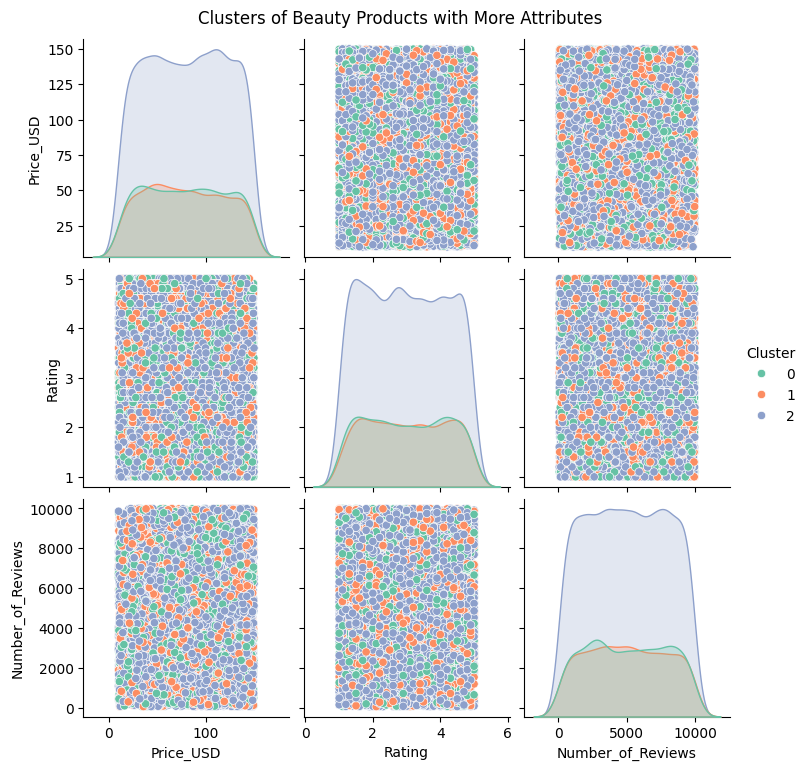

In [14]:
# Apply KMeans clustering
kmeans_ext = KMeans(n_clusters=3, random_state=42)
clusters_ext = kmeans_ext.fit_predict(scaled_extended)

# Add cluster labels back to original DataFrame
df['Extended_Cluster'] = clusters_ext

# Prepare data for visualization
plot_data = df[['Price_USD', 'Rating', 'Number_of_Reviews', 'Skin_Type', 'Gender_Target', 'Extended_Cluster']]
plot_data.rename(columns={'Extended_Cluster': 'Cluster'}, inplace=True)

# Plot pairplot to visualize the clusters
sns.pairplot(plot_data, hue='Cluster', diag_kind='kde', palette='Set2')
plt.suptitle("Clusters of Beauty Products with More Attributes", y=1.02)
plt.show()

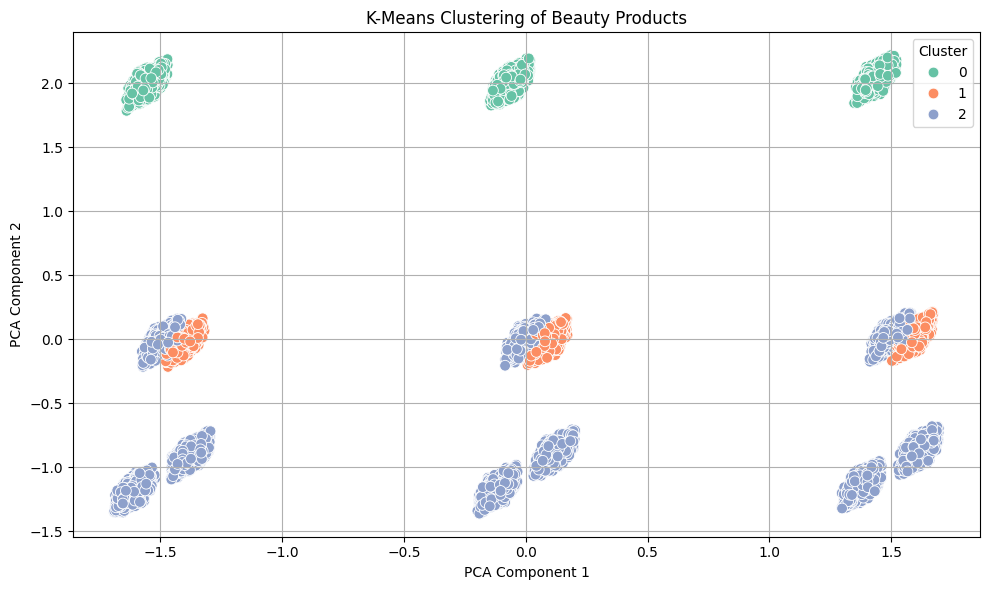

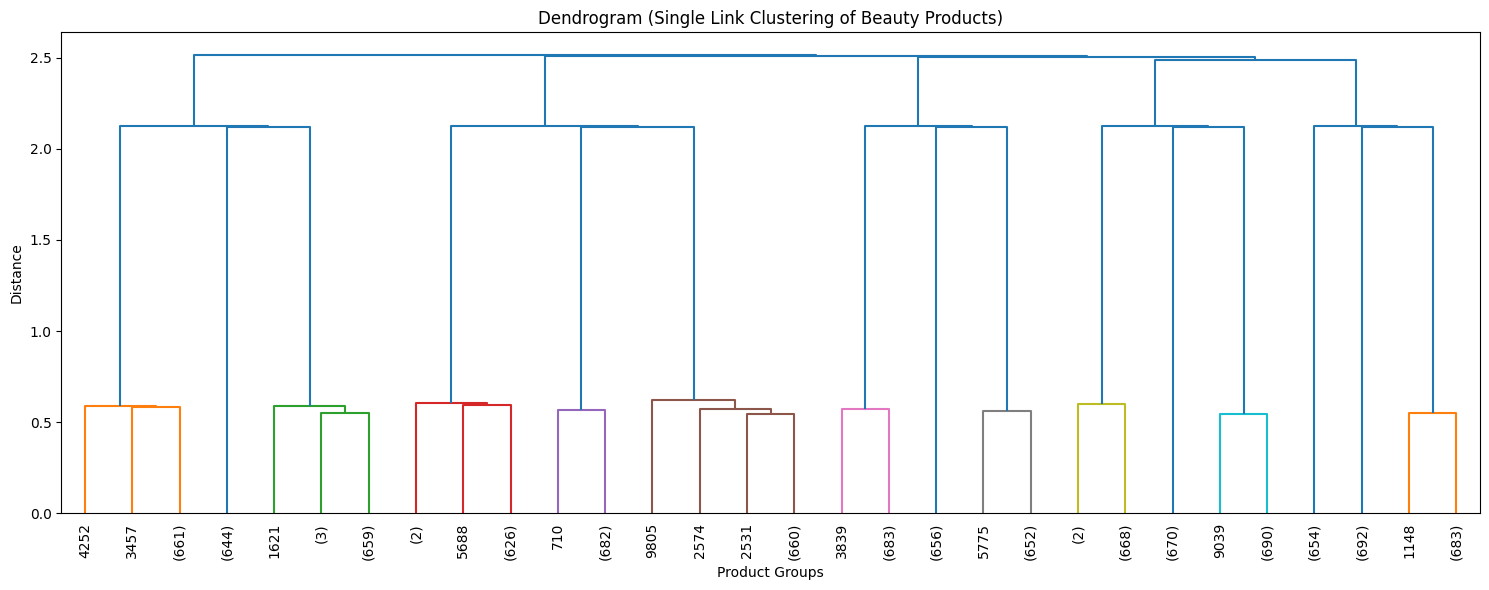

In [17]:
  # Single Link Clustering
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(file_path)

# Select relevant columns
features = df[['Price_USD', 'Rating', 'Number_of_Reviews', 'Skin_Type', 'Gender_Target']]

# One-hot encode categorical columns
features_encoded = pd.get_dummies(features, columns=['Skin_Type', 'Gender_Target'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # you can try other values like 4 or 5
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Visualize clusters using PCA (reduce to 2D for plotting)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=60)
plt.title("K-Means Clustering of Beauty Products")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(file_path)

# Select attributes
features = df[['Price_USD', 'Rating', 'Number_of_Reviews', 'Skin_Type', 'Gender_Target']]

# One-hot encode categorical columns
features_encoded = pd.get_dummies(features, columns=['Skin_Type', 'Gender_Target'], drop_first=True)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_encoded)

# Apply Single Link Clustering
linked = linkage(scaled_features, method='single')  # single linkage = nearest neighbor

# Plot the dendrogram (for a smaller sample to keep it readable)
plt.figure(figsize=(15, 6))
dendrogram(linked,
           truncate_mode='lastp',  # show only last p merged clusters
           p=30,                   # adjust depending on how many you want to see
           leaf_rotation=90.,
           leaf_font_size=10.)
plt.title("Dendrogram (Single Link Clustering of Beauty Products)")
plt.xlabel("Product Groups")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()